In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [60]:

df = pd.read_hdf('data/1week-Pair2DLC_dlcrnetms5_californiamouseMay31shuffle1_70000_el.h5')
df.dropna().to_csv('Pair2.csv')


In [61]:
df = pd.read_csv('Pair2.csv',header=[1,2,3])
df

individuals   mouseA                                                   \
       bodyparts        a                            b                       
          coords        x        y likelihood        x        y likelihood   
0              0  787.849   11.130      0.954  758.892   48.299      0.999   
1              1  789.117   11.614      0.986  754.309   47.423      1.000   
2              2  771.823   19.646      0.919  747.324   47.334      1.000   
3              3  773.176   18.596      0.963  745.295   54.101      1.000   
4              4  772.503   18.197      0.964  744.755   55.021      1.000   
...          ...      ...      ...        ...      ...      ...        ...   
3330        6072  428.954  107.893      1.000  382.105  126.563      1.000   
3331        6076  673.516  242.814      1.000  640.759  209.052      1.000   
3332        6077  631.154  324.544      1.000  609.455  264.610      1.000   
3333        6078  620.541  386.405      1.000  603.477  325.148      1.000   
3334        6080  601.117  511.093      1.000  601.303  463.440      0.999   

                                   ...     mouseB                    \
            c                      ...          b        c            
            x        y likelihood  ... likelihood        x        y   
0     736.519   75.051      0.999  ...      1.000  603.584  414.420   
1     733.879   75.146      1.000  ...      1.000  603.764  414.456   
2     728.156   78.337      1.000  ...      1.000  603.592  414.076   
3     727.154   79.818      1.000  ...      0.995  604.146  414.508   
4     724.755   81.319      1.000  ...      0.991  568.126  430.574   
...       ...      ...        ...  ...        ...      ...      ...   
3330  344.158  157.324      0.998  ...      1.000  388.688  369.336   
3331  614.069  187.264      1.000  ...      0.999  760.638  212.571   
3332  598.655  220.221      1.000  ...      1.000  801.768  151.837   
3333  595.367  272.365      1.000  ...      0.998  795.931   90.275   
3334  594.259  432.418      1.000  ...      0.987  642.532   61.656   

                                                                           
                       d                            e                      
     likelihood        x        y likelihood        x        y likelihood  
0         0.998  610.907  375.560      0.999  598.516  347.279      1.000  
1         0.999  609.622  375.580      1.000  599.297  346.461      1.000  
2         0.999  610.285  374.695      0.999  599.962  347.623      1.000  
3         0.975  611.908  375.733      0.999  601.842  349.719      1.000  
4         0.992  598.879  409.386      0.992  616.231  376.920      1.000  
...         ...      ...      ...        ...      ...      ...        ...  
3330      1.000  391.650  332.749      1.000  397.653  304.470      1.000  
3331      0.994  737.222  253.734      0.992  739.392  293.124      1.000  
3332      0.998  784.683  193.476      1.000  781.188  225.526      1.000  
3333      0.998  793.809  119.601      0.997  801.794  161.970      1.000  
3334      0.990  684.122   53.673      0.901  708.142   36.040      0.146  

[3335 rows x 31 columns]

In [68]:
MouseA_ax = df[('mouseA','a','x')]
MouseA_ay = df[('mouseA','a','y')]
MouseB_ax = df[('mouseB','a','x')]
MouseB_ay = df[('mouseB','a','y')]

MouseA_cx = df[('mouseA','c','x')]
MouseA_cy = df[('mouseA','c','y')]
MouseB_cx = df[('mouseB','c','x')]
MouseB_cy = df[('mouseB','c','y')]

MouseA_ex = df[('mouseA','e','x')]
MouseA_ey = df[('mouseA','e','y')]
MouseB_ex = df[('mouseB','e','x')]
MouseB_ey = df[('mouseB','e','y')]

previous_Ax = df[('mouseA','c','x')]
before_Ax = df[('mouseA','c','x')]
previous_Ay = df[('mouseA','c','y')]
before_Ay = df[('mouseA','c','y')]

previous_Bx = df[('mouseB','c','x')]
before_Bx = df[('mouseB','c','x')]
previous_By = df[('mouseB','c','y')]
before_By = df[('mouseB','c','y')]

previous_Ax.drop(index=previous_Ax.index[-1], axis=0, inplace=True)
before_Ax.drop(index=before_Ax.index[0], axis=0, inplace=True)
previous_Ay.drop(index=previous_Ay.index[-1], axis=0, inplace=True)
before_Ay.drop(index=before_Ay.index[0], axis=0, inplace=True) 

previous_Bx.drop(index=previous_Bx.index[-1], axis=0, inplace=True)
before_Bx.drop(index=before_Bx.index[0], axis=0, inplace=True)
previous_By.drop(index=previous_By.index[-1], axis=0, inplace=True)
before_By.drop(index=before_By.index[0], axis=0, inplace=True) 

previous_Ax.reset_index(drop=True,inplace=True)
before_Ax.reset_index(drop=True,inplace=True)
previous_Ay.reset_index(drop=True,inplace=True)
before_Ay.reset_index(drop=True,inplace=True)

previous_Bx.reset_index(drop=True,inplace=True)
before_Bx.reset_index(drop=True,inplace=True)
previous_By.reset_index(drop=True,inplace=True)
before_By.reset_index(drop=True,inplace=True)

mouseA_dir_dis = np.sqrt(pow((MouseA_ax-MouseA_cx),2) + pow((MouseA_ay - MouseA_cy),2))
mouseA_to_mouseB = np.sqrt(pow((MouseA_ax-MouseB_cx),2) + pow((MouseA_ay - MouseB_cy),2))
mouseB_dir_dis = np.sqrt(pow((MouseB_ax-MouseB_cx),2) + pow((MouseB_ay - MouseB_cy),2))
mouseB_to_mouseA = np.sqrt(pow((MouseB_ax-MouseA_cx),2) + pow((MouseB_ay - MouseA_cy),2))

In [69]:
nose_to_nose = np.sqrt(pow((MouseA_ax-MouseB_ax),2) + pow((MouseA_ay - MouseB_ay),2))
noseA_to_rearB = np.sqrt(pow((MouseA_ax-MouseB_ex),2) + pow((MouseA_ay - MouseB_ey),2))
noseB_to_rearA = np.sqrt(pow((MouseB_ax-MouseA_ex),2) + pow((MouseB_ay - MouseA_ey),2))
proximity = np.sqrt(pow((MouseA_cx-MouseB_cx),2) + pow((MouseA_cy - MouseB_cy),2))
velocity_A = np.sqrt(pow((previous_Ax-before_Ax),2) + pow((previous_Ay - before_Ay),2))
velocity_B = np.sqrt(pow((previous_Bx-before_Bx),2) + pow((previous_By - before_By),2))
angle_AtoB = np.arccos((pow(mouseA_dir_dis,2) + pow(mouseA_to_mouseB,2) - pow(proximity,2))/(2*mouseA_dir_dis*mouseA_to_mouseB))
angle_BtoA = np.arccos((pow(mouseB_dir_dis,2) + pow(mouseB_to_mouseA,2) - pow(proximity,2))/(2*mouseB_dir_dis*mouseB_to_mouseA))


In [70]:
nose_to_nose.drop(index=nose_to_nose.index[-1], axis=0, inplace=True)
noseA_to_rearB.drop(index=noseA_to_rearB.index[-1], axis=0, inplace=True)
noseB_to_rearA.drop(index=noseB_to_rearA.index[-1], axis=0, inplace=True)
proximity.drop(index=proximity.index[-1], axis=0, inplace=True)
angle_AtoB.drop(index=angle_AtoB.index[-1], axis=0, inplace=True)
angle_BtoA.drop(index=angle_BtoA.index[-1], axis=0, inplace=True)
speed_diff = np.absolute(velocity_A-velocity_B)

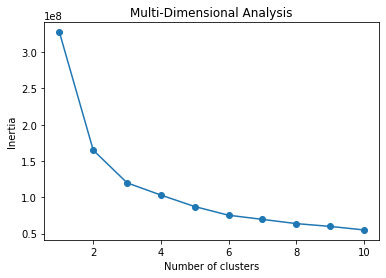

In [77]:
data = list(zip(noseA_to_rearB,noseB_to_rearA,proximity,velocity_A,velocity_B,angle_AtoB,angle_BtoA))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Multi-Dimensional Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

F:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 3334 samples in 0.004s...
[t-SNE] Computed neighbors for 3334 samples in 0.217s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3334
[t-SNE] Computed conditional probabilities for sample 2000 / 3334
[t-SNE] Computed conditional probabilities for sample 3000 / 3334
[t-SNE] Computed conditional probabilities for sample 3334 / 3334
[t-SNE] Mean sigma: 42.879785
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.890339
[t-SNE] KL divergence after 1250 iterations: 0.606037


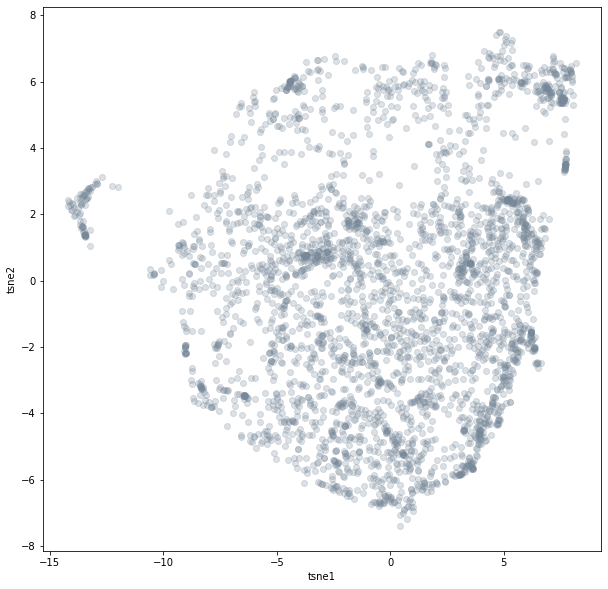

In [78]:
tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(data)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2','tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

In [79]:
from sklearn.metrics import silhouette_score

kmeans_tsne_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df_scale)
print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne_scale.labels_, metric='euclidean')))
labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

KMeans tSNE Scaled Silhouette Score: 0.35947349667549133


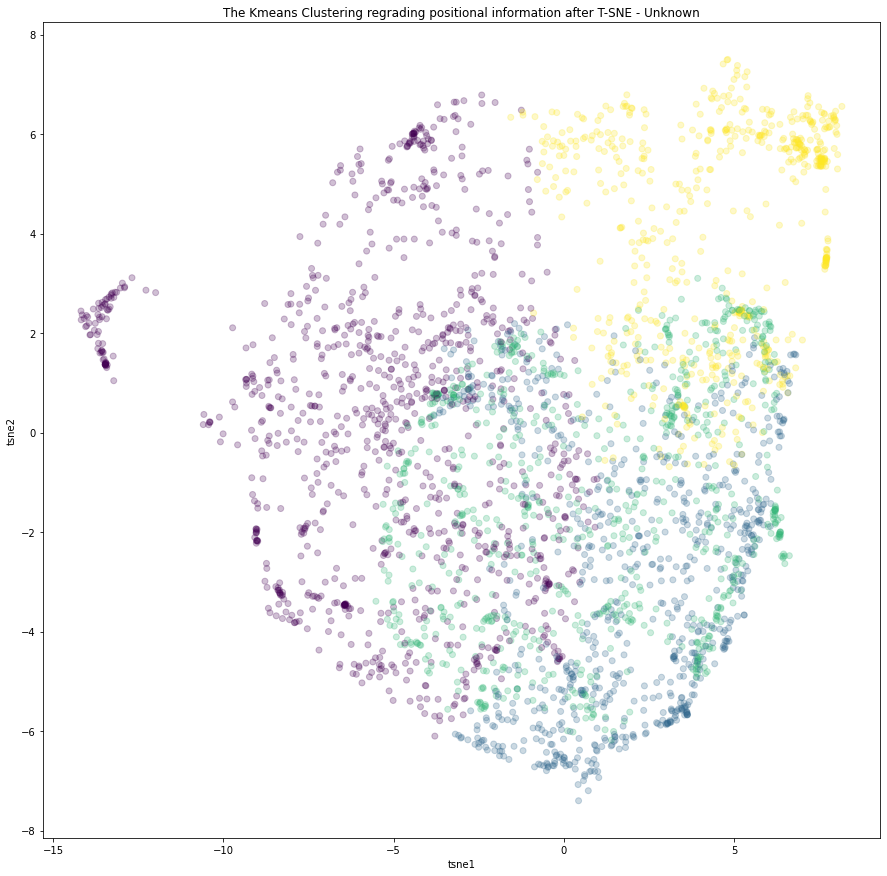

In [80]:
plt.figure(figsize = (15,15))
plt.scatter(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],alpha=0.25, c=kmeans_tsne_scale.labels_)
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.title('The Kmeans Clustering regrading positional information after T-SNE - Unknown')
plt.show()

In [81]:
import plotly.graph_objs as go

Scene = dict(xaxis = dict(title  = 'tsne1'),yaxis = dict(title  = 'tsne2'),zaxis = dict(title  = 'tsne3'))
labels = labels_tsne_scale
trace = go.Scatter3d(x=clusters_tsne_scale.iloc[:,0], y=clusters_tsne_scale.iloc[:,1], z=clusters_tsne_scale.iloc[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'yellow',width = 5)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 1000,width = 1000)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

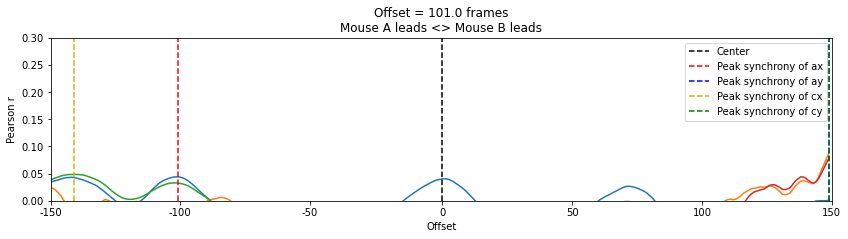

In [56]:
d1 = pd.Series(MouseA_ax)
d2 = pd.Series(MouseA_ay)
d3 = pd.Series(MouseB_ax)
d4 = pd.Series(MouseB_ay)
d5 = pd.Series(MouseA_cx)
d6 = pd.Series(MouseA_cy)
d7 = pd.Series(MouseB_cx)
d8 = pd.Series(MouseB_cy)
d9 = pd.Series(MouseA_ex)
d10 = pd.Series(MouseA_ey)
d11 = pd.Series(MouseB_ex)
d12 = pd.Series(MouseB_ey)

seconds = 5
fps = 30
rs = [crosscorr(d1,d3, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
rs1 = [crosscorr(d2,d4, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
rs2 = [crosscorr(d5,d7, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
rs3 = [crosscorr(d6,d8, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.plot(rs1)
ax.plot(rs2)
ax.plot(rs3)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony of ax')
ax.axvline(np.argmax(rs1),color='b',linestyle='--',label='Peak synchrony of ay')
ax.axvline(np.argmax(rs2),color='y',linestyle='--',label='Peak synchrony of cx')
ax.axvline(np.argmax(rs3),color='g',linestyle='--',label='Peak synchrony of cy')
ax.set(title=f'Offset = {offset} frames\nMouse A leads <> Mouse B leads',ylim=[.01,.1],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
ax.set_ylim(0,0.3)
plt.legend()

In [48]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

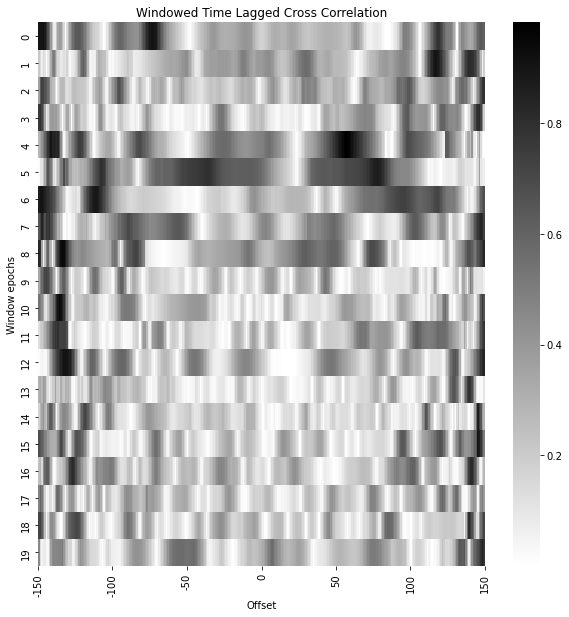

In [67]:
MouseA_ax = df[('mouseA','a','x')]
MouseA_ay = df[('mouseA','a','y')]
MouseB_ax = df[('mouseB','a','x')]
MouseB_ay = df[('mouseB','a','y')]

MouseA_cx = df[('mouseA','c','x')]
MouseA_cy = df[('mouseA','c','y')]
MouseB_cx = df[('mouseB','c','x')]
MouseB_cy = df[('mouseB','c','y')]

MouseA_ex = df[('mouseA','e','x')]
MouseA_ey = df[('mouseA','e','y')]
MouseB_ex = df[('mouseB','e','x')]
MouseB_ey = df[('mouseB','e','y')]

# Windowed time lagged cross correlation
import seaborn as sns

seconds = 5
fps = 30
no_splits = 20
samples_per_split = df.shape[0]/no_splits
rss=[]
for t in range(0, no_splits):
    d1 = df[('mouseA','c','x')].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    d2 = df[('mouseB','c','x')].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
    rss.append(rs)
rss = np.absolute(rss)
rss = pd.DataFrame(rss)
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(rss,cmap="binary",ax=ax)
ax.set(title=f'Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Window epochs')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

In [63]:
rss

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,-0.904325,-0.903769,-0.908168,-0.924361,-0.871282,-0.794442,-0.683665,-0.542826,-0.389224,-0.230088,...,-0.326884,-0.348296,-0.385461,-0.443103,-0.517351,-0.583212,-0.625267,-0.638508,-0.620760,-0.610497
1,-0.209338,-0.136183,-0.064246,0.151908,0.106592,-0.008065,-0.091979,-0.180774,-0.322418,-0.473462,...,0.809562,0.803549,0.787161,0.736871,0.672110,0.582138,0.458912,0.271828,0.061470,-0.188658
2,0.362068,0.629827,0.730202,0.712388,0.664009,0.626840,0.568792,0.499915,0.310022,0.267873,...,-0.305642,-0.210040,-0.042554,0.149631,0.304635,0.438084,0.555812,0.675496,0.791995,0.787079
3,-0.766619,-0.792179,-0.716110,-0.565958,-0.333976,-0.069127,0.145016,0.297783,0.386548,0.392846,...,-0.253666,-0.409594,-0.531864,-0.666105,-0.767572,-0.809545,-0.816335,-0.721859,-0.446270,-0.187381
4,-0.286132,-0.338749,-0.408789,-0.499297,-0.592979,-0.686072,-0.773566,-0.846425,-0.900571,-0.846032,...,0.245488,-0.409507,-0.118861,-0.080298,-0.020100,0.218786,0.373297,0.135932,0.040011,0.005259
5,-0.019272,-0.105527,-0.098449,-0.225938,-0.337878,-0.524703,-0.660005,-0.578286,-0.511446,-0.359335,...,0.105654,0.096346,0.062486,0.033557,0.117753,0.160957,0.370302,0.094246,0.080830,-0.068047
6,0.873790,0.905050,0.902571,0.884332,0.850049,0.819356,0.795540,0.772418,0.740397,0.706587,...,-0.057307,-0.038549,-0.075267,-0.139105,-0.252849,-0.360993,-0.493685,-0.595302,-0.659285,-0.682877
7,0.645296,0.729202,0.841840,0.775085,0.675401,0.771924,0.757897,0.800331,0.691978,0.678064,...,-0.392660,-0.452287,-0.542392,-0.640143,-0.717894,-0.762402,-0.808779,-0.840059,-0.816874,-0.734084
8,0.831301,0.800117,0.351370,-0.055704,-0.251297,-0.502462,-0.597346,-0.356584,-0.290410,0.029625,...,-0.653535,-0.618150,-0.578295,-0.522993,-0.594510,-0.657496,-0.698147,-0.732934,-0.777716,-0.827649
9,0.336699,0.481029,0.568753,0.641710,0.707050,0.730449,0.699853,0.632681,0.549193,0.449022,...,-0.509990,-0.403287,-0.219712,0.106191,0.122097,0.099893,0.098664,0.103220,0.116314,0.053136
